# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Sainan Chen
- Liying Gui
- Yuechen Liu
- Kunal Parilekar
- Maryam Rahdaran
- Mingshuo Yu

# Group Members IDs

- A14483750
- A14428755
- A15682187
- A12747850
- A15714113
- A

# Research Question

*Fill in your research question here*

## Background and Prior Work

Suicide has became one of the major causes of death in recent years. According to World Health Organization (WHO), there are 800,000 people commit suicide every year, which is twice the population for all UC campus, and it equals to one life lose every 40 seconds. The trend of increasing suicide rate can also be seen from previous researches. According to Bertolote and Fleischmann, global suicide rates per 100,000 population increased from 22 in 1950 to 32 in 1995, and finally expected to 37 in 2020. They also mentions that total estimate of suicide in 2020 would be 1.53 million. 

To effectively reduce the suicide rate, social behavior scientists and psychologists want to find out if suicide is related to physical conditions. Another two focus of Bertolote and Fleischmann’s paper is correlation of gender and age with suicide rate. Generally the male suicide rate is higher than female and the ratio is still growing every year (3.2:1 in 1950, 3.6:1 in 1995 and 3.9:1 in 2020). Furthermore, when the age increases, the suicide rate also increases (rate of 1.2 in age group 5-14, and 55.7 in age group over 75). Another factor influencing suicide rate that Antonio and Preti mentioned in their paper is climate and season. Elders’ suicide time distribution is more seasonally asymmetric, and people are more likely to commit suicide with violent methods during spring time than late autumns. In contrast, non-violent suicide has the opposite time distribution from violent suicide time distribution. More specifically, suicide rate is positively correlated to temperature and exposure to sun. 

In our project, besides looking at the suicide trend and checking the influence of gender and age on suicide rate using 30-year data, we want to further investigate if the country people live also affect suicide rate by looking at the country’s HDI and GDP. 

References (include links):
- 1)Bertolote, Manoel José and Fleischmann Alexandra Fleischmann. “A global perspective
in the epidemiology of suicide.” Suicidologi, 2002, årg. 7, nr. 2. https://www.iasp.info/pdf/papers/Bertolote.pdf.
- 2) Antonio Preti,􏰒, Paola Miotto, 1998. “Seasonality in suicides: the influence of suicide method, gender and age on suicide distribution in Italy.” Psychiatry Research, Volume 81, Issue 2, 16 November 1998, Pages 219-231. https://www.sciencedirect.com/science/article/pii/S0165178198000997.

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [81]:
#Import the libraries
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Set up the dataframe
main_df = pd.read_csv("master.csv")
#Set up the supplementary dataframe for HDI
supp_df = pd.read_csv("Human-development-index-HDI.csv", encoding='latin-1')

In [3]:
#Now combine the two databases
#Get the earliest year from the main database
min_year = main_df['year'].min()
print(min_year)
#This falls before the supp database so leave it for now
supp_df


1985


,Human development index (HDI),Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,168,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.437,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498
1,68,Albania,0.645,0.626,0.610,0.613,0.619,0.632,0.641,0.641,...,0.724,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785
2,85,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.608,0.617,...,0.709,0.719,0.729,0.736,0.740,0.745,0.747,0.749,0.753,0.754
3,35,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.831,0.830,0.828,0.827,0.849,0.850,0.853,0.854,0.856,0.858
4,147,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.502,0.522,0.520,0.535,0.543,0.554,0.564,0.572,0.577,0.581
5,70,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.777,0.770,0.766,0.762,0.765,0.768,0.770,0.775,0.778,0.780
6,47,Argentina,0.704,0.713,0.720,0.725,0.728,0.731,0.738,0.746,...,0.795,0.799,0.813,0.819,0.818,0.820,0.820,0.822,0.822,0.825
7,83,Armenia,0.631,0.628,0.580,0.588,0.599,0.605,0.612,0.623,...,0.727,0.724,0.728,0.731,0.737,0.742,0.745,0.748,0.749,0.755
8,3,Australia,0.866,0.867,0.868,0.872,0.875,0.883,0.886,0.889,...,0.920,0.921,0.923,0.925,0.929,0.931,0.933,0.936,0.938,0.939
9,20,Austria,0.795,0.800,0.805,0.807,0.813,0.817,0.820,0.824,...,0.884,0.886,0.895,0.897,0.899,0.897,0.901,0.903,0.906,0.908


In [4]:
supp_df['Country'] = supp_df['Country'].astype(str)
supp_df.dtypes

Human development index (HDI)      int64
Country                           object
1990                             float64
1991                             float64
1992                             float64
1993                             float64
1994                             float64
1995                             float64
1996                             float64
1997                             float64
1998                             float64
1999                             float64
2000                             float64
2001                             float64
2002                             float64
2003                             float64
2004                             float64
2005                             float64
2006                             float64
2007                             float64
2008                             float64
2009                             float64
2010                             float64
2011                             float64
2012            

In [34]:
main_df.rename(columns={' gdp_for_year ($) ':'gdp_for_year ($)'}, inplace=True)
main_df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,-1.000,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,-1.000,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,-1.000,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,-1.000,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,-1.000,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,-1.000,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,-1.000,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,-1.000,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,-1.000,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,-1.000,"2,156,624,900",796,Generation X


In [6]:
#Set a comparator
comparator = np.float64(10)
#Now iterate through the main and find relevant values
for i, row in main_df.iterrows():
    #Only do this if there isn't already a value for HDI
    if(pd.isna(row['HDI for year'])):
        value = -1
        country = row['country']
        year = row['year']
        year = str(year)
        #Get the relevant row from the supp dataframe
        hdi_row = supp_df.loc[supp_df['Country'].str.contains(country)]
        #Check if the year is in the columns
        if(year in hdi_row.columns):
            #If so, get the value
            value = hdi_row[year]
        #If the value was found and it wasn't -1, and the series is not empty get the first value of the series
        if(type(value) != type(-1)):
            if(len(value) > 0):
                value = (value.values[0])
                if(pd.isna(value)):
                    value = -1
            else:
                value = -1
        main_df.loc[i, 'HDI for year'] = value

# Data Cleaning

Describe your data cleaning steps here.

In [7]:
#First get an understanding of what the data looks like
main_df.shape

(27820, 12)

In [8]:
checked_df = main_df.dropna()
checked_df.shape

(27820, 12)

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [9]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

1. Is suicide rate growing every year? 

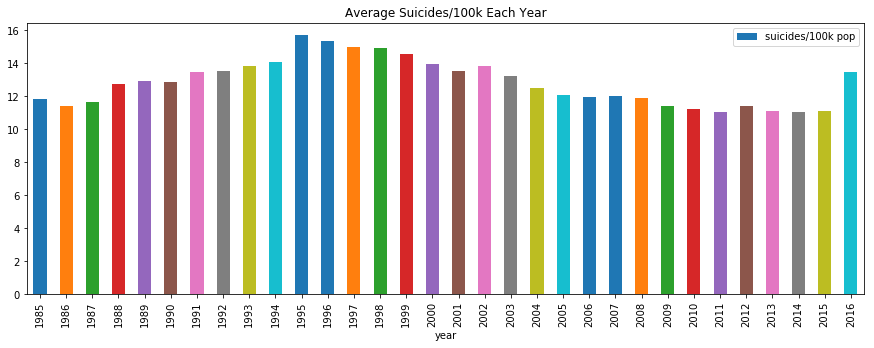

In [10]:
year_group = main_df.groupby('year').mean()
year_group.plot(y='suicides/100k pop',kind="bar", figsize=(15, 5), title="Average Suicides/100k Each Year")

As we can see in the graph, we cannot conclude that the suicide rate is growing each year. We can see from the graph that there is a peak in 1995 and 2016 but there is no clear clue to show that the suicide rate is either increasing or decreasing.

2. In general, which population is more likely to commit suicide? (country, age, gender) 

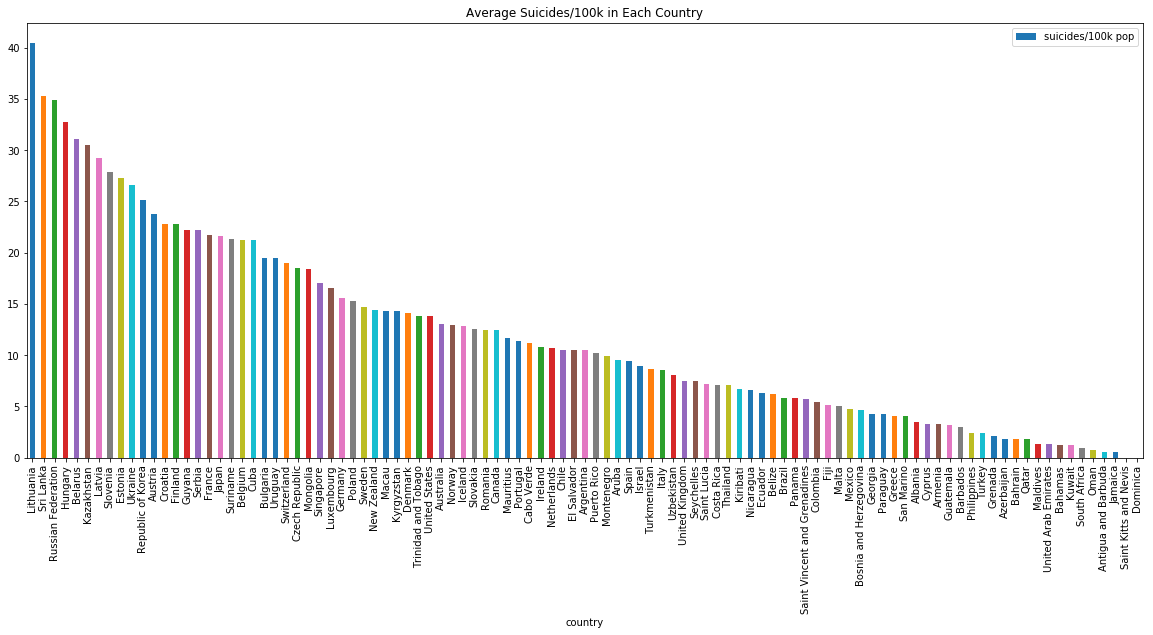

In [11]:
country_group = main_df.groupby('country').mean()
country_group = country_group.sort_values(by=['suicides/100k pop'], ascending=False)
country_group.plot(y='suicides/100k pop',kind="bar", figsize=(20, 8), title="Average Suicides/100k in Each Country")

In [12]:
country_group

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
country,,,,,,
Lithuania,2005.419847,107.019084,2.598672e+05,40.415573,0.794176,9280.549618
Sri Lanka,1997.545455,421.522727,1.382770e+06,35.295152,0.523091,904.272727
Russian Federation,2002.000000,3733.771605,1.139137e+07,34.892377,0.681074,6518.814815
Hungary,2003.419355,238.358065,8.020782e+05,32.761516,0.717284,9370.051613
Belarus,2001.095238,237.666667,7.832234e+05,31.075913,0.313952,3333.904762
Kazakhstan,2002.500000,325.467949,1.209980e+06,30.511282,0.657077,5329.115385
Latvia,2005.000000,50.674603,1.779867e+05,29.259325,0.773381,8961.095238
Slovenia,2005.000000,42.123016,1.597961e+05,27.827857,0.849143,18642.238095
Estonia,2005.000000,27.912698,1.075032e+05,27.276905,0.811048,11376.095238


Above table is countries that are sorted in the order of suicide rate. As we can see the countries listed in the top have higher suicide rate.

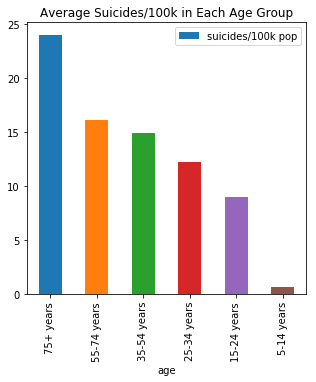

In [43]:
age_group = main_df.groupby('age').mean()
age_group = age_group.sort_values(by=['suicides/100k pop'], ascending=False)
age_group.plot(y='suicides/100k pop',kind="bar", figsize=(5, 5), title="Average Suicides/100k in Each Age Group")

As we can see in the graph above, age group of 75+ has the highest suicide rate and age group of 5-1

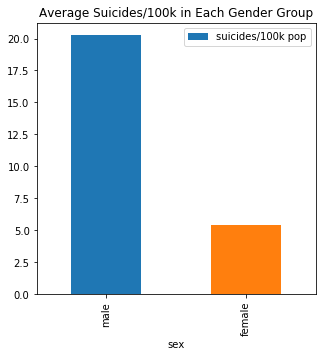

In [44]:
gender_group = main_df.groupby('sex').mean()
gender_group = gender_group.sort_values(by=['suicides/100k pop'], ascending=False)
gender_group.plot(y='suicides/100k pop',kind="bar", figsize=(5, 5), title="Average Suicides/100k in Each Gender Group")

As we can see in the graph above, males' suicide rate is significantly higher than females'.

## GDP per capita and suicide rate

In [58]:
# combine suicide number of diffent gender and age in same country and same year
aggregation_functions = {'country-year': 'first','country': 'first','year': 'first', 'suicides/100k pop': 'sum', 'gdp_per_capita ($)': 'first'}
df_new = main_df.groupby(main_df['country-year']).aggregate(aggregation_functions).reindex(columns=main_df.columns)
df_new.drop(['sex', 'age', 'suicides_no','population','HDI for year','gdp_for_year ($)','generation'], inplace=True, axis=1)

### Scatter plot

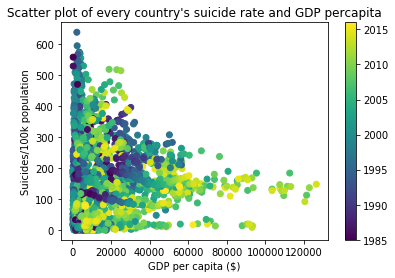

In [41]:
# scatter plot to see suicide rate and GDP per capita for countries in different year
plt.scatter(df_new['gdp_per_capita ($)'],df_new['suicides/100k pop'],c=df_new['year'])
plt.title("Scatter plot of every country's suicide rate and GDP per capita")
plt.xlabel("GDP per capita ($)")
plt.ylabel("Suicides/100k population")
plt.colorbar()
plt.show()

On the scatter plot, we can see in general, the GDP per capita for countries gradually increase from 1985 to 2015, and the suicide rate is a little bit dropping from 1985 to 2015. Although higher the GDP per capita, the upper boundary for suicide rate drops, we still can't see clearly how suicide rate distributes for countries with same GDP per capita. 

To further investigate, we specifically look into data in 2015 and 1985.

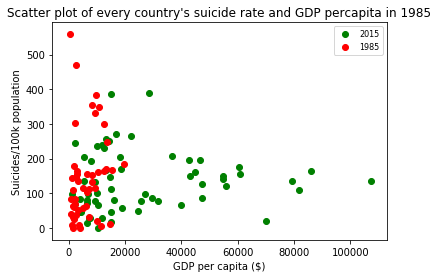

In [55]:
# scatter plot to see suicide rate and GDP per capita for different countries in year 1985
year_2015 = plt.scatter(df_new[df_new['year']==2015]['gdp_per_capita ($)'],df_new[df_new['year']==2015]['suicides/100k pop'], color='g')
year_1985 = plt.scatter(df_new[df_new['year']==1985]['gdp_per_capita ($)'],df_new[df_new['year']==1985]['suicides/100k pop'], color='r')
plt.title("Scatter plot of every country's suicide rate and GDP percapita in 1985")
plt.xlabel("GDP per capita ($)")
plt.ylabel("Suicides/100k population")
plt.legend((year_2015, year_1985),('2015', '1985'),scatterpoints=1,loc='upper right',fontsize=8)
plt.show()

From the scatter plot, we can clearly see that in general the GDP per capita is higher in 2015 than 1985. However, although the hightes suicide rate in one country drops in 2015, it's unclear how the suicide rate distribution in 2015 differs from the suicide rate distribution ino 1985. During both of the years, we can see as GDP per capita increase, there are less countries with extremely low suicide rate as well as countries with extremely high suicide rate. 

We want to run a linear regression model to check the linear relationship between GDP per capita and suicide rate in both years.

### Linear Regression Model

The simple linear regression model takes following form: 

y = a+bx

where in this case:
y is the suicide rate per 100k population 
x is the GDP per capita in dollar
a is the y-incercept 
b is the gradient, which means the increase the suicide rate per unit increase on GDP per capita.

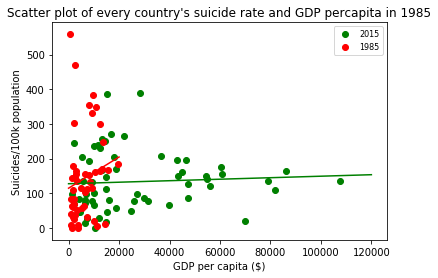

In [57]:
# best fit line in linear regression model
a1, b1 = np.polyfit(df_new[df_new['year']==2015]['gdp_per_capita ($)'], df_new[df_new['year']==2015]['suicides/100k pop'], 1)
gdp_2015 = np.arange(0,120000)
pred_suicide_rate_2015 = a1*gdp_2015 + b1

a2, b2 = np.polyfit(df_new[df_new['year']==1985]['gdp_per_capita ($)'], df_new[df_new['year']==1985]['suicides/100k pop'], 1)
gdp_1985 = np.arange(0,20000)
pred_suicide_rate_1985 = a2*gdp_1985 + b2

year_2015 = plt.scatter(df_new[df_new['year']==2015]['gdp_per_capita ($)'],df_new[df_new['year']==2015]['suicides/100k pop'], color='g')
year_1985 = plt.scatter(df_new[df_new['year']==1985]['gdp_per_capita ($)'],df_new[df_new['year']==1985]['suicides/100k pop'], color='r')
plt.plot(gdp_2015, pred_suicide_rate_2015, '-r',color = 'g')
plt.plot(gdp_1985, pred_suicide_rate_1985, '-r',color = 'r')
plt.title("Scatter plot of every country's suicide rate and GDP percapita in 1985")
plt.xlabel("GDP per capita ($)")
plt.ylabel("Suicides/100k population")
plt.legend((year_2015, year_1985),('2015', '1985'),scatterpoints=1,loc='upper right',fontsize=8)
plt.show()

According to the linear regression line, in both years, the suicide rate is in positive relation with GDP per capita. Higher the GDP per capita of the country, more likely the country has a higher suicide rate. By looking at the gradients of the regression lines, we conjecture in 1985 the GDP per capita has larger influence on suicide rate compared to 2015.

Then we want to check how reliable our linear regression model is.

In [79]:
df_new.rename(columns={'gdp_per_capita ($)':'gdp_per_capita'}, inplace=True)
df_new.rename(columns={'suicides/100k pop':'suicides'}, inplace=True)

df_new_2015 = df_new[df_new['year']==2015]
correlation_2015 = np.corrcoef(df_new_2015['gdp_per_capita'],df_new_2015['suicides'])

df_new_1985 = df_new[df_new['year']==1985]
correlation_1985 = np.corrcoef(df_new_1985['gdp_per_capita'],df_new_1985['suicides'])


The correlation of suicide rate and GDP per capita in 2015 is 0.061, which means the data conform little to the linear model. The correlation of suicide rate and GDP per capita in 1985 is 0.168, which means the data conform slightly more to the linear model than data in 2015.

To run the hypothesis test with significance level 0.05, we have following hypotheses:

Null hypothesis: There is no linear relationship between suicide rate and GDP per capita. (b=0)

Alternative hypothesis: There is a linear relationship between suicide rate and GDP per capita. (b not equal to 0)

### Hypothesis test for Linear Regression Model for 2015

In [82]:
#find p-value for linear regression in 2015 
outcome_1, predictors_1 = patsy.dmatrices('suicides ~ gdp_per_capita', df_new_2015)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:               suicides   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.2274
Date:                Thu, 30 May 2019   Prob (F-statistic):              0.635
Time:                        16:03:06   Log-Likelihood:                -363.13
No. Observations:                  62   AIC:                             730.3
Df Residuals:                      60   BIC:                             734.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        127.4415     16.173      7.

In [87]:
# alternative way to find P-value
lm1 = smf.ols(formula='suicides ~ gdp_per_capita', data=df_new_2015).fit()
lm1.pvalues

Intercept         7.856747e-11
gdp_per_capita    6.352218e-01
dtype: float64

The P-value is 0.635, which is larger than 0.05, therefore Null hypothesis (H0) is accepted, and there's no clear linear relationship between GDP per capita and suicide rate in 2015.

### Hypothesis test for Linear Regression Model for 1985

In [88]:
#find p-value for linear regression in 2015 
outcome_2, predictors_2 = patsy.dmatrices('suicides ~ gdp_per_capita', df_new_1985)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()

print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:               suicides   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.2274
Date:                Thu, 30 May 2019   Prob (F-statistic):              0.635
Time:                        16:08:32   Log-Likelihood:                -363.13
No. Observations:                  62   AIC:                             730.3
Df Residuals:                      60   BIC:                             734.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        127.4415     16.173      7.

In [89]:
# alternative way to find P-value
lm2 = smf.ols(formula='suicides ~ gdp_per_capita', data=df_new_1985).fit()
lm2.pvalues

Intercept         0.000410
gdp_per_capita    0.254058
dtype: float64

The P-value is 0.254, which is larger than 0.05, therefore Null hypothesis (H0) is accepted, and there's no clear linear relationship between GDP per capita and suicide rate in 1985.

### Conclusion

There is no clear linear relationship between country GDP per capita and suicide rate in year 2015 as well as 1985. However, we can see from scatter plot that highter the country's GDP per capita, it's less likely for the country to have extremely high or extremely low suicide rate, and the more predicable the country's suicide rate is. In the countries with low GDP per capita, the flotation of suicide rate might be caused by the countrie's specific situations besides GDP.

# Ethics & Privacy

- Based on the Kaggle policy we complied that we use the Services for our own internal, personal, non-commercial use, and not on behalf of or for the benefit of any third party therefore we have the permission to use the data. Since what we are doing is a non-profit school project that is not for the benefit of any third party, we believe that we have permission to use the data. (https://www.kaggle.com/terms)
- We believe that we do not need to deal with the privacy concerns since the data is masked. Similar to data that is protected by the Safe Harbour method, we cannot see any identifiers of the individuals that are in this dataset.
- There is potential bias in our dataset, that is, the dataset is not complete. It is missing some countries (including China and India, which are the two countries with most population in the world) therefore a large number of population is excluded in this dataset.
- Another issue is that we do not know how the data was collected, therefore we are not sure if the data is completely accurate. It is possible that in some countries the suiciders were not found or some people’s cause of death was misidentified.
- Unfortunately we cannot tell if the data is collected exactly accurate or not. However, since the dataset is analyzing the relationship among age, gender and country GDP, we can analyze the data even though the data does not include every country in the world since we are doing the hypothesis test of relationship .


# Conclusion & Discussion

*Fill in your discussion information here*